# AAL Q4 Sales Analysis Project
## Course End Project – Unit 2

**Name:** Alexander Ruiz  
**Platform:** JupyterLab Notebook

## Project Overview
This notebook provides an overview of AAL’s Q4 apparel sales data. It includes basic data preparation, analysis, and visualizations to highlight general sales patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

csv_path = "AusApparalSales4thQrt2020.csv"
df = pd.read_csv(csv_path)
print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (7560, 6)


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [3]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [4]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
df["Time"].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

**Note:** Shows spaces found. Need to get rid of spaces.

In [6]:
df["Time"] = df["Time"].str.strip().str.title()
df["Time"].unique()

array(['Morning', 'Afternoon', 'Evening'], dtype=object)

In [7]:
time_map = {
    "Morning": "09:00",
    "Afternoon": "15:00",
    "Evening": "19:00"
}
df["Time_fixed"] = df["Time"].map(time_map)

**Note:** I cleaned the time column and mapped each time period to an exact hour. Now it could be combined with the Date column later for time analysis that will be shown later.

In [8]:
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time_fixed"])
df.head()

,Date,Time,State,Group,Unit,Sales,Time_fixed,DateTime
0,1-Oct-2020,Morning,WA,Kids,8,20000,09:00,2020-10-01 09:00:00
1,1-Oct-2020,Morning,WA,Men,8,20000,09:00,2020-10-01 09:00:00
2,1-Oct-2020,Morning,WA,Women,4,10000,09:00,2020-10-01 09:00:00
3,1-Oct-2020,Morning,WA,Seniors,15,37500,09:00,2020-10-01 09:00:00
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,15:00,2020-10-01 15:00:00


**Note:** After fixing the time labels. I merged them with the date to get a full DateTime value. This makes it easier to plot sales trends over time

In [9]:
df_norm = df.copy()
scaler = MinMaxScaler()
df_norm[["Unit", "Sales"]] = scaler.fit_transform(df_norm[["Unit", "Sales"]])
df_norm.head()

,Date,Time,State,Group,Unit,Sales,Time_fixed,DateTime
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238,09:00,2020-10-01 09:00:00
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238,09:00,2020-10-01 09:00:00
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746,09:00,2020-10-01 09:00:00
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349,09:00,2020-10-01 09:00:00
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873,15:00,2020-10-01 15:00:00


**Note:** Normalized the numeric columns to make the data easier to compare and to prepare it for analysis and visualization

In [10]:
df.groupby("State")["Sales"].sum()
df.groupby("Group")["Sales"].sum()

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

**Note:** Men have the highest total sales and Seniors havee the lowest. Shows that all four groups buy fairly evenly. Marketing could focus a little more on Men and Women since it looks like they spend the mosst.

# Data Analysis

In [11]:
sales_mean = df["Sales"].mean()
sales_median = df["Sales"].median()
sales_mode = df["Sales"].mode()[0]
sales_std = df["Sales"].std()
unit_mean = df["Unit"].mean()
unit_median = df["Unit"].median()
unit_mode = df["Unit"].mode()[0]
unit_std = df["Unit"].std()
sales_mean, sales_median, sales_mode, sales_std, unit_mean, unit_median, unit_mode, unit_std

(45013.5582010582,
 35000.0,
 22500,
 32253.506943966073,
 18.00542328042328,
 14.0,
 9,
 12.90140277758643)

**Note** The average salemean is about 45,013.The median is 35,000.
This means some very high sales values pull the mean upward. The most commmon sale amount is 22,500. The standard deviation is large 32,253, showing sales vary a lot between entries.

In [12]:
group_sales = df.groupby("Group")["Sales"].sum().sort_values(ascending=False)
group_sales

Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64

**Note:** I grouped the data by group and added up the total sales for each group to compare which group brought in the most sales.

In [13]:
weekly_sales = df.resample("W", on="DateTime")["Sales"].sum()
weekly_sales

DateTime
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

**Note:** This code groups the sales by week instead of day. Weekly totals make it easier to spot general trends across the quarter.

In [14]:
monthly_sales = df.resample("M", on="DateTime")["Sales"].sum()
monthly_sales

DateTime
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

**Note:** This resamples the data by month and adds up all sales in each month.

In [15]:
quarterly_sales = df.resample("Q", on="DateTime")["Sales"].sum()
quarterly_sales

DateTime
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

**Note:** This code adds up all the sales for the whole quarter.

In [16]:
from scipy.stats import shapiro
stat, p_value = shapiro(df["Sales"])
stat, p_value

/usr/local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8955548405647278, 0.0)

**Note:** The p-value is almost zero so the sales are not normally distributed. This makes sense because retail sales vary a lot.

# Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

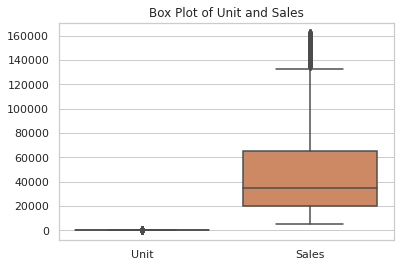

In [18]:
sns.boxplot(data=df[["Unit", "Sales"]])
plt.title("Box Plot of Unit and Sales")
plt.show()

**Note:** Sales have a very wide range and hig sales. Units are on a much smaller scale and closee. The sales amounts vary a lot verssus units.

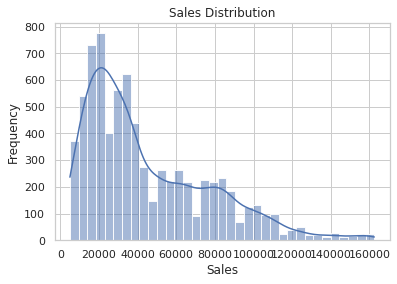

In [19]:
sns.histplot(df["Sales"], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

**Note:** Shows right skewed. Sales are more mid to low range with very few high ones.

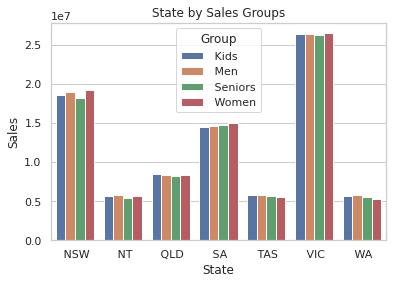

In [20]:
state_group_sales = df.groupby(["State", "Group"])["Sales"].sum().reset_index()
sns.barplot(data=state_group_sales, x="State", y="Sales", hue="Group")
plt.title("State by Sales Groups")
plt.xticks(rotation=0)
plt.show()

**Note:** Shows the states llike TAS, NT, ACT and SA have much lower totals. Shows that VIC and NSW have the highest sales. All four groups follow the same pattern in every state. Showing the sales performance is based by the states.

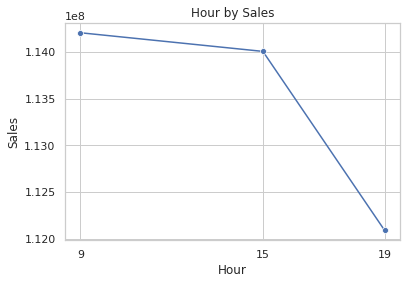

In [21]:
df["Hour"] = df["DateTime"].dt.hour
hourly_sales = df.groupby("Hour")["Sales"].sum().reset_index()
sns.lineplot(data=hourly_sales, x="Hour", y="Sales", marker="o")
plt.title("Hour by Sales")
plt.xticks([9, 15, 19])
plt.show()

**Note:** Sales are highest in the morning, slightly lower in the afternoon, and drop the most in the evening. This shows that customers buy more earlier in the day.

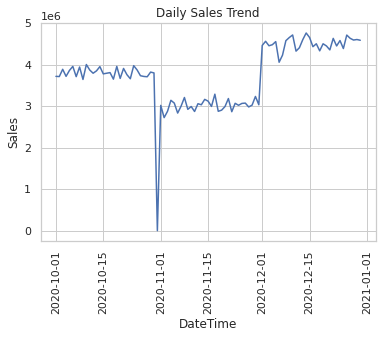

In [22]:
daily_sales = df.resample("D", on="DateTime")["Sales"].sum().reset_index()
sns.lineplot(data=daily_sales, x="DateTime", y="Sales")
plt.title("Daily Sales Trend")
plt.xticks(rotation=90)
plt.show()

**Note:** Daily sales stay stable but show some natural ups and downs. There is one sharp drop which might be data entry issue or an unusually low sales day.

In [23]:
daily_sales = df.resample("D", on="DateTime")["Sales"].sum().reset_index()
daily_sales.sort_values("Sales").head()

,DateTime,Sales
30,2020-10-31,0
32,2020-11-02,2725000
36,2020-11-06,2835000
52,2020-11-22,2867500
41,2020-11-11,2872500


In [24]:
low_day = daily_sales.sort_values("Sales").iloc[0]
low_day

DateTime    2020-10-31 00:00:00
Sales                         0
Name: 30, dtype: object

In [25]:
date_to_check = low_day["DateTime"].date()
df[df["DateTime"].dt.date == date_to_check]

,Date,Time,State,Group,Unit,Sales,Time_fixed,DateTime,Hour


In [26]:
df[df["Sales"] < 1000]

,Date,Time,State,Group,Unit,Sales,Time_fixed,DateTime,Hour


**Note:** Since the dataset does not contain sales records for 2020/10/31 the 0 value created during resampling should either be removed or replaced with the average daily sales to prevents false dips in the trend.I will now repalce this value if the avergae to get a more accurate trend. Then show another display to thats cleaned.

In [27]:
avg_daily = daily_sales["Sales"].mean()
avg_daily

3739587.912087912

In [28]:
daily_sales["Sales"] = daily_sales["Sales"].replace(0, avg_daily)

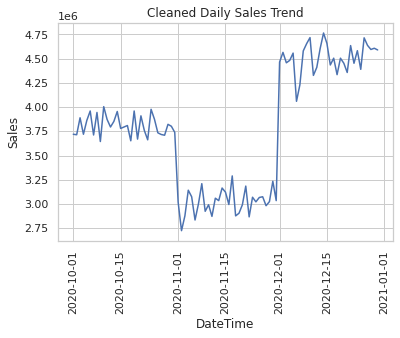

In [29]:
sns.lineplot(data=daily_sales, x="DateTime", y="Sales")
plt.title("Cleaned Daily Sales Trend")
plt.xticks(rotation=90)
plt.show()

**Note:** After replacing the missing day with the average daily sales, the trend is much smoother and no longer drops to zero. The pattern now clearly shows steady sales in October, a dip in mid-November, and a strong rise in December. This gives a more accurate representation of the quarter’s sales activity.

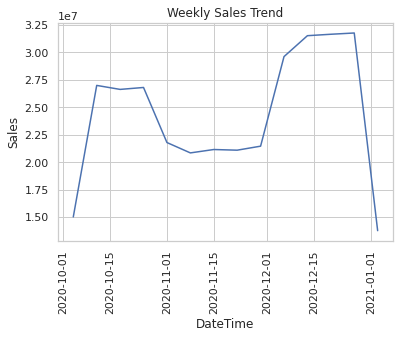

In [30]:
weekly_sales = df.resample("W", on="DateTime")["Sales"].sum().reset_index() # cell
sns.lineplot(data=weekly_sales, x="DateTime", y="Sales")
plt.title("Weekly Sales Trend")
plt.xticks(rotation=90)
plt.show()

**Note:** The lineplot shows clear patterns. Sales dip slightly in the middle of the quarter but rises at the end of December because of holdiays.

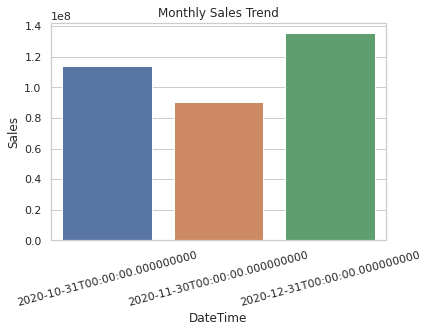

In [31]:
monthly_sales = df.resample("M", on="DateTime")["Sales"].sum().reset_index()
sns.barplot(data=monthly_sales, x="DateTime", y="Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation= 15)
plt.show()

**Note:** November has the lowest monthly sales. October is higher, and December is the strongest month overall. This indicates its due by holiday demand.

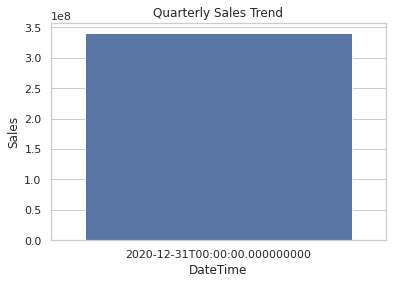

In [32]:
quarterly_sales = df.resample("Q", on="DateTime")["Sales"].sum().reset_index()
sns.barplot(data=quarterly_sales, x="DateTime", y="Sales")
plt.title("Quarterly Sales Trend")
plt.xticks(rotation=0)
plt.show()

**Note:** The quarterly total shows strong overall performance for Q4. Shows all the revunue and the dataset covers only one quarter. Nothing out of the ordinary

**Recommmended Visualization:** 
I chose Seaborn because it makes clean, easy to read charts with very simple code. It works well with Pandas, so creating visualizations from the dataset is straightforward. Seaborn also includes useful statistical plots like box plots and distributions. Ita helps catch data that is missing or wrong data entry as shown above. Its the best choice for clear and effective data visuals.

# Report Generation

This report was created in JupyterLab which made it easy to put my code, charts, and explanations together. I used Markdown throughout the project to describe what each part of the analysis was doing and to briefly explain the results. The visualizations, I chose different types of plots depending on what I needed to look at. A box plot was used to show basic descriptive statiistics, and a Seaborn distribution plot helped illustrate how the sales values were spread out. I also included bar and line charts to compare sales across states, groups, and different time periods. Throughout the notebook, I added short observations and recommendations based on the patterns that appeared in the data.

Overall, the notebook organizes the data wrangling, analysis, and visualizations in a way that makes the results easier to understand and helps support better decision-making for the Sales and Marketing team.
